<aside>
💡 Question-1:

Given a Binary Tree (Bt), convert it to a Doubly Linked List(DLL). The left and right pointers in nodes are to be used as previous and next pointers respectively in converted DLL. The order of nodes in DLL must be the same as in Inorder for the given Binary Tree. The first node of Inorder traversal (leftmost node in BT) must be the head node of the DLL.

Example:
    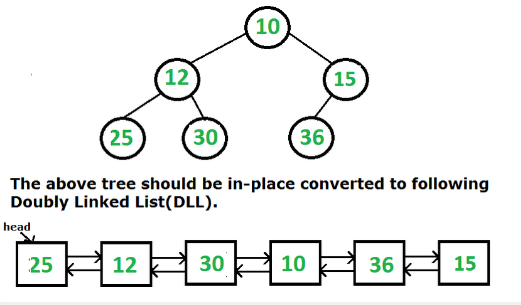

</aside>

In [1]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class DoublyLinkedListNode:
    def __init__(self, value):
        self.value = value
        self.prev = None
        self.next = None

def convert_to_dll(root):
    if root is None:
        return None

    head = None  # Head of the DLL
    prev = None  # Previously processed node

    def inorder_traversal(node):
        nonlocal head, prev

        if node is None:
            return

        inorder_traversal(node.left)

        # Convert current node to a DLL node
        current = DoublyLinkedListNode(node.value)

        if prev is None:
            # If prev is None, set the current node as the head of the DLL
            head = current
        else:
            # Otherwise, update the pointers of prev and current nodes
            prev.next = current
            current.prev = prev

        prev = current

        inorder_traversal(node.right)

    inorder_traversal(root)

    return head

# Create the binary tree
root = TreeNode(10)
root.left = TreeNode(5)
root.right = TreeNode(20)
root.right.left = TreeNode(15)
root.right.right = TreeNode(30)

# Convert the binary tree to a doubly linked list
dll_head = convert_to_dll(root)

# Print the doubly linked list forwards
current = dll_head
while current:
    print(current.value, end=" ")
    current = current.next

# Output: 5 10 15 20 30


5 10 15 20 30 

<aside>
💡 Question-2

A Given a binary tree, the task is to flip the binary tree towards the right direction that is clockwise. See the below examples to see the transformation.

In the flip operation, the leftmost node becomes the root of the flipped tree and its parent becomes its right child and the right sibling becomes its left child and the same should be done for all left most nodes recursively.

Example1:
    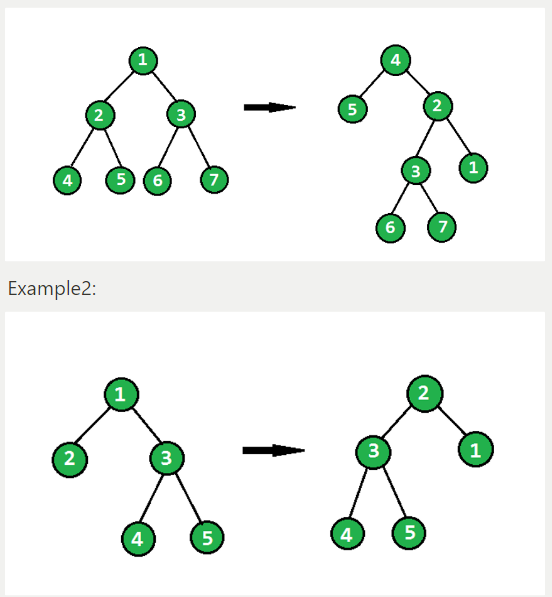

</aside>

In [2]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def flip_binary_tree(root):
    if root is None:
        return None

    if root.left is None and root.right is None:
        return root

    flipped_root = flip_binary_tree(root.left)

    root.left.left = root.right
    root.left.right = root
    root.left = root.right = None

    return flipped_root

def inorder_traversal(node):
    if node is None:
        return
    inorder_traversal(node.left)
    print(node.value, end=" ")
    inorder_traversal(node.right)

# Create the binary tree
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

# Flip the binary tree
flipped_root = flip_binary_tree(root)

# Perform inorder traversal on the flipped tree
inorder_traversal(flipped_root)

# Output: 7 6 3 5 4 1 2


5 4 6 3 7 2 1 

<aside>
💡 Question-3:

Given a binary tree, print all its root-to-leaf paths without using recursion. For example, consider the following Binary Tree.

Input:

               6
            /    \
           3      5
         /   \     \
        2     5     4
            /   \
           7     4

Output:

There are 4 leaves, hence 4 root to leaf paths -
  6->3->2
  6->3->5->7
  6->3->5->4
  6->5>4

</aside>

In [3]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def print_root_to_leaf_paths(root):
    if root is None:
        return

    stack = [(root, str(root.value))]

    while stack:
        node, path = stack.pop()

        if node.left is None and node.right is None:
            print(path)
        if node.right:
            stack.append((node.right, path + "->" + str(node.right.value)))
        if node.left:
            stack.append((node.left, path + "->" + str(node.left.value)))

# Create the binary tree
root = TreeNode(6)
root.left = TreeNode(3)
root.right = TreeNode(5)
root.left.left = TreeNode(2)
root.left.right = TreeNode(5)
root.right.right = TreeNode(4)
root.left.right.left = TreeNode(7)
root.left.right.right = TreeNode(4)

# Print all root-to-leaf paths
print_root_to_leaf_paths(root)

# Output:
# 6->3->2
# 6->3->5->7
# 6->3->5->4
# 6->5->4


6->3->2
6->3->5->7
6->3->5->4
6->5->4


<aside>
💡 Question-4:

Given Preorder, Inorder and Postorder traversals of some tree. Write a program to check if they all are of the same tree.

**Examples:**

Input : 

        Inorder -> 4 2 5 1 3
        Preorder -> 1 2 4 5 3
        Postorder -> 4 5 2 3 1
Output : 

Yes
Explanation : 

All of the above three traversals are of
the same tree 

                           1
                         /   \
                        2     3
                      /   \
                     4     5

Input : 

        Inorder -> 4 2 5 1 3
        Preorder -> 1 5 4 2 3
        Postorder -> 4 1 2 3 5
Output :
         No

</aside>

In [4]:
def check_same_tree(inorder, preorder, postorder):
    if not inorder or not preorder or not postorder:
        return True

    if len(inorder) != len(preorder) or len(inorder) != len(postorder):
        return False

    # Check if the first element of the preorder traversal matches the last element of the postorder traversal
    if preorder[0] != postorder[-1]:
        return False

    # Find the root index in the inorder traversal
    root_index = inorder.index(preorder[0])

    # Split the traversals into left and right subtrees
    inorder_left = inorder[:root_index]
    inorder_right = inorder[root_index + 1:]
    preorder_left = preorder[1:root_index + 1]
    preorder_right = preorder[root_index + 1:]
    postorder_left = postorder[:root_index]
    postorder_right = postorder[root_index:-1]

    # Recursively check if the left and right subtrees are the same trees
    return check_same_tree(inorder_left, preorder_left, postorder_left) and \
           check_same_tree(inorder_right, preorder_right, postorder_right)

# Example input
inorder = [4, 2, 5, 1, 3]
preorder = [1, 2, 4, 5, 3]
postorder = [4, 5, 2, 3, 1]

# Check if the traversals belong to the same tree
is_same_tree = check_same_tree(inorder, preorder, postorder)

# Print the result
if is_same_tree:
    print("The traversals belong to the same tree.")
else:
    print("The traversals do not belong to the same tree.")


The traversals belong to the same tree.
